In [4]:
import tensorflow as tf 
from tensorflow import keras
tf.__version__

'2.10.0'

In [5]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [6]:
# load keras data set
(x_train, y_train),(x_test, y_test) =keras.datasets.mnist.load_data()

In [7]:
# check the shapes 
x_train.shape

(60000, 28, 28)

In [23]:
x_test.shape

(10000, 28, 28)

In [10]:
y_train.shape

(60000,)

In [11]:
y_test.shape

(10000,)

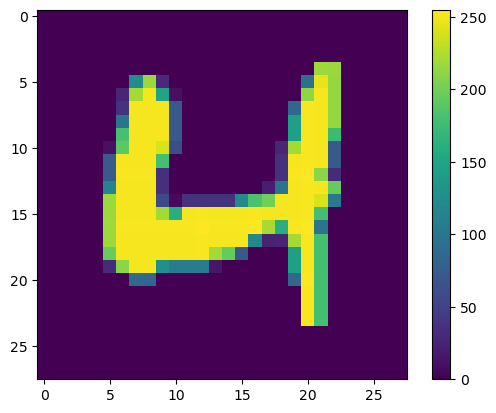

In [13]:
# display random x_train, y_train
np.random.seed(0)
ran_num=np.random.randint(0,60000)
plt.figure()
plt.imshow(x_train[ran_num])
plt.colorbar()
plt.grid(False)
plt.show()

In [14]:
# check the y label 
y_train[ran_num]

4

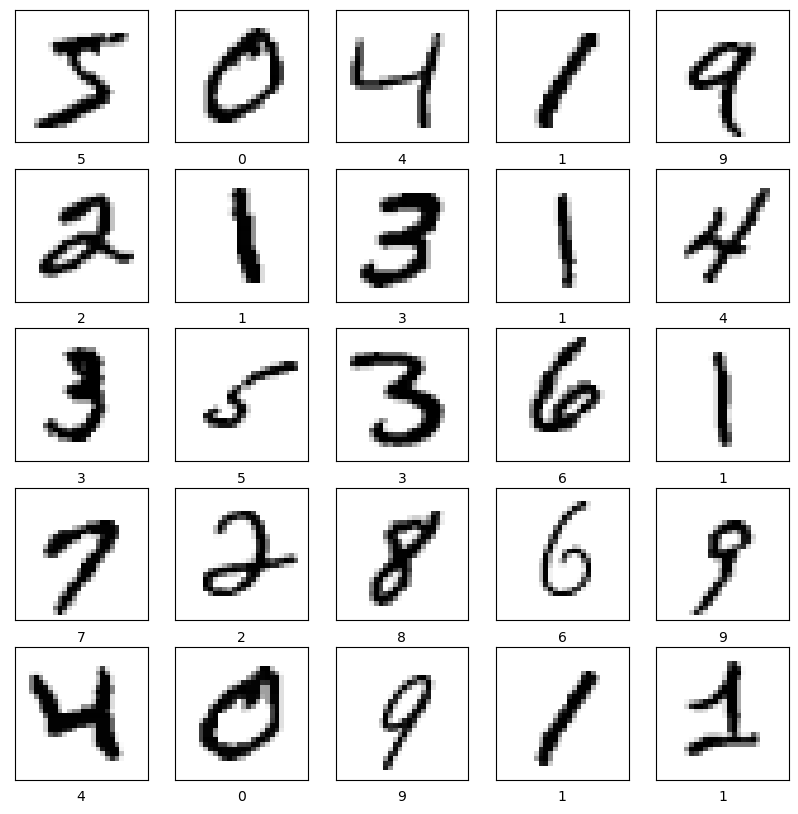

In [21]:
# disaplay first 25 images (5,5) with lables 
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i] , cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

In [22]:
# scaling images 
x_train = x_train /255.0
x_test = x_test / 255.0

In [26]:
# create model 
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

2023-01-23 00:40:54.463183: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [28]:
# model optimizer
model.compile(optimizer='adam',
             loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy']
             )

In [29]:
# model train
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.7931 - accuracy: 0.7496
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3706 - accuracy: 0.8917
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3148 - accuracy: 0.9077
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2766 - accuracy: 0.9192
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2427 - accuracy: 0.9286
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2145 - accuracy: 0.9363
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1911 - accuracy: 0.9431
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1713 - accuracy: 0.9489
Epoch 9/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1539 - accuracy: 0.9538
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.138

In [30]:
# model evaluation
tess_loss, tess_acc=model.evaluate(x_test, y_test)
tess_acc

313/313 [==============================] - 0s 928us/step - loss: 0.1391 - accuracy: 0.9575


0.9574999809265137

In [31]:
# model serialize
model.save('mnist_digits.model')

INFO:tensorflow:Assets written to: mnist_digits.model/assets


In [32]:
# model deserilie 
model_keras = tf.keras.models.load_model('mnist_digits.model/')

In [80]:
# prediction on loaded model
prediction  = model_keras.predict(x_test[10].reshape(1,28,28))

1/1 [==============================] - 0s 23ms/step


In [81]:
prediction

array([[  6.866864  , -10.023448  ,   1.3290954 ,  -3.3683336 ,
         -8.893125  ,   0.86414087,  -2.851984  ,  -7.617949  ,
         -1.3467689 ,  -3.945118  ]], dtype=float32)

In [82]:
detect_class = np.argmax(prediction[0])

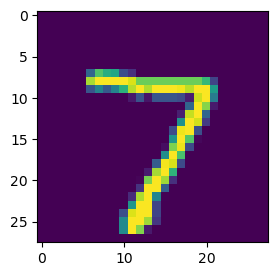

In [83]:
plt.figure(figsize=(3,3))
plt.imshow(x_test[detect_class])
plt.grid(False)
plt.show()

In [84]:
# check with y_test
y_test[detect_class]

7